# Exploratory Data Analysis (EDA) Template #

Ordre ideal del procés EDA:  
Inspecció inicial del conjunt de dades:  

Comprovar la grandària i les columnes del dataset.  
Revisar les primeres files per tenir una idea de la seva estructura i contingut.  


Neteja de dades (primer pas abans de qualsevol visualització):  
   - Identificació i gestió dels NaN:  
        - Comptar els valors nuls per columna i veure on es troben.  
        - Decidir si es poden imputar (amb mitjana, mediana, moda, etc.) o eliminar.  
        - Substituir els valors "unknown" o altres valors problemàtics per valors raonables o neutralitzar-los.

   - Conversió de dades categòriques:
Convertir les variables categòriques binàries a booleans (0/1), i utilitzar one-hot encoding si cal.  

Detecció i tractament dels outliers:  

Abans de fer anàlisis de correlació o regressions, és important eliminar o gestionar valors atípics que podrien afectar les correlacions.  
Pots utilitzar tècniques com l'interquartile range (IQR) o l'escalat robust per gestionar els outliers.  
Anàlisi descriptiva (una vegada les dades estan netes):  

Estadístiques resum: Mitjana, desviació estàndard, percentils, mínim, màxim, etc.  
Visualització d'histogrames: Per veure les distribucions de les variables un cop les dades estiguin netes.  
Boxplots: Per veure la distribució i identificar outliers d'una manera visual.  
Anàlisi de correlacions:  

Un cop les dades estiguin netes i sense NaNs, pots calcular correlacions amb mètodes com Pearson per a dades numèriques o Cramér’s V per a categòriques.
Visualitzar aquestes correlacions amb heatmaps per identificar relacions significatives.  

In [712]:
#1. Importació de Biblioteques #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
sns.set(style='whitegrid')

In [733]:
banc_original = pd.read_csv ('bank_dataset.csv') # carreguem el dataset
banc_original.head(5) # mostrem les primeres files

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [734]:
# Informació general del dataset
banc_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [735]:
# Descripció estadística del dataset
banc_original.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11152.0,41.235384,11.914934,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [912]:
# EDA automàtic amb Sweetviz
report = sv.analyze(banc)
report.show_html('bank_dataset.csv.html')

                                             |          | [  0%]   00:00 -> (? left)

Report bank_dataset.csv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


El conjunt de dades té 11.162 observacions i 17 columnes, amb una barreja de variables numèriques i categòriques.  
La variable objectiu és deposit, que indica si el client ha fet un dipòsit (sí/no).  

### Variables numèriques destacades: ###
L'edat mitja és de 41 anys i el 75% dels valors estan per sota els 49.
A nivell de saldo hi ha molta diversificació : amb una mitjana de 1.528, però amb un mínim de -6.847 i un màxim de 81.204, i la meitat de clients tenen per sota els 550€ de saldo positiu i un 25% està casi en saldo negatiu.
El temps en segons de la trucada, amb una mitjana de 372 segons(uns 6 minuts).    
La variable "campaign" mostra el nombre de contactes realitzats amb el client durant la campanya de màrqueting actual... Potser s'hauria de crear una variable nova per fer un càlcul del promig de temps implicat en el total de la campanya o potser la relació és millor considerar-la tal i com està (durada de la trucada i per separat, nombre de contactes realitzats).  
La variable "day" dia del mes en què es va realitzar el contacte o la interacció amb el client. Es veu clarament que baixen els dies entre el 20 i 28. Aquesta variable s'haurà de transformar doncs, no representa exactament una quantitat mesurable sinó una tendencia en el temps (relació directe en quan el banc a gestionat els ingressos de nòmina o cobrat préstecs).   
La variable "pdays" nombre de dies que han passat des de la darrera vegada que un client va ser contactat, s'haurà d'estudiar bé doncs em confonen els números negatius. Suposo que negatiu es refereix a no contacte doncs són la majoria de valors. Equivaldria a No contactat però és numèrica de moment.
La variable "previous", contactes anteriors realitzats... tindria llògica l'interpretació de la variable anterior, doncs fins el tercer quartil, son 0. 

### Variables categòriques destacades: ###
Feines: la majoria de categories representen, gerents, ma d'obra i tècnics.  
Estats civils compren 3 categories: solter, casat, divorciat. Sent lleugerament superior la quantitat de perfils casats que els no casats.
Educació: Més del 30% tenen estudis superiors i més del 50% la secundaria, sent molt baixa la tasa de perfils que només han arribat a primària. 

### Variables de Si/no (a convertir a booleanes): ###
La variable objectiu, és dipòsit, amb gairebé igual nombre de "no" (5.873) i "sí" (5.289).    
La variable "loan" es refereix a si el client té un préstec personal. És una variable categòrica amb valors "yes" o "no".  
La variable "housing" es refereix directament a la hipoteca.  
La variable "default" fa referencia a si el client ha tingut algun impagament o si es troba en morositat en algun crèdit o deute.  
En relació al contacte, hi ha masses valors desconeguts, amb la qual cosa, sabent de que es tracta de màrketing telefònic, donem per suposat que les consultes s'han realitzat per telèfon, aquesta variable no té valor i la eleminarem. 
La variable "default" es refereix a si el client ha tingut algun impagament. El 90% no han faltat a cap pagament.
En relació a "poutcome" (resultat en la campanya anterior), ens passa el mateix. Hem de valorar, veient la quantitat de dipòsits realitzats, si val més la pena no contar amb la variable, o substituir variables per la moda. Però crec que jugarem només amb:   
VARIABLE OBJECTIU:  Deposit.

### Netejo els valors Nuls ###

In [736]:
print(banc_original.isnull().sum())  # Comptar valors nuls

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64


In [781]:
# Hacer una copia del DataFrame
banc = banc_original.copy()

In [782]:
# Reemplazo NaN en 'age' con la media
banc['age'] = banc['age'].fillna(banc['age'].mean())

# Reemplazo NaN en 'marital' y 'education' con la moda
banc['marital'] = banc['marital'].fillna(banc['marital'].mode()[0])
banc['education'] = banc['education'].fillna(banc['education'].mode()[0])

# Verifico si quedan NaNs
banc.isnull().sum().sum()

0

In [783]:
# Valores únicos antes del reemplazo
print(banc['contact'].unique())
print(banc['poutcome'].unique())

['unknown' 'cellular' 'telephone']
['unknown' 'other' 'failure' 'success']


In [784]:
# Eliminar les columnes 'contact', 'poutcome' del nou df
banc.drop(columns=['contact', 'poutcome'], inplace=True)

In [785]:
# Crear la nova columna 'contact_previ' basada en 'previous'
banc['contact_previ'] = banc['previous'].apply(lambda x: 'yes' if x > 0 else 'no')

# Comprovar si la transformació ha creat només valors 1 o 0
print(banc['contact_previ'].value_counts())

# Eliminar la columna 'previous' ja que és redundant amb 'contact_previ'
banc.drop(columns=['previous'], inplace=True)

contact_previ
no     8324
yes    2838
Name: count, dtype: int64


### Converteixo les variables objecte a categòriques de moment

In [786]:
### Converteixo les variables objecte a categories ###

In [787]:
banc[['job', 'marital', 'education', 'contact_previ']] = banc[['job', 'marital', 'education', 'contact_previ']].astype('category')

In [788]:
### Converteixo month a ordinal donant un ordre, day no cal, despres farem orderencoder ###

In [789]:
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
banc['month'] = pd.Categorical(banc['month'], categories=months_order, ordered=True)

In [790]:
banc['age'] = banc['age'].astype(int)

C:\Users\thais\AppData\Local\Temp\ipykernel_4596\3746237857.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_filtered.index, y=counts_filtered.values, ax=ax, palette='Set2')
C:\Users\thais\AppData\Local\Temp\ipykernel_4596\3746237857.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_filtered.index, y=counts_filtered.values, ax=ax, palette='Set2')


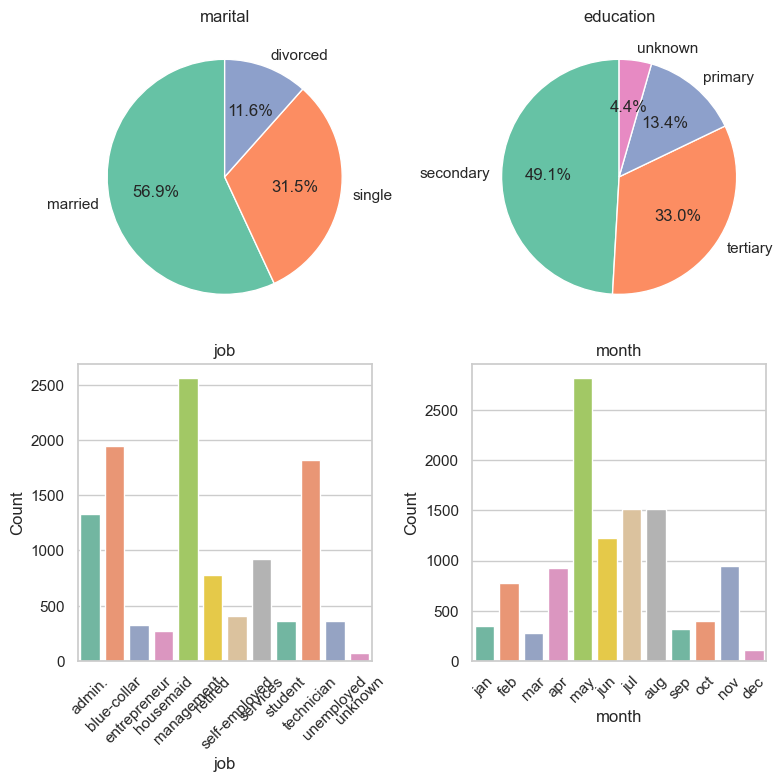

In [791]:
# Variables categóricas
categorical_vars = ['marital', 'education']
bar_vars = ['job', 'month']
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Gráficos circulares para marital y education
for ax, var in zip(axes.flatten()[:2], categorical_vars):
    counts = banc[var].value_counts()
    
    # Crear el gráfico de pastel
    counts.plot.pie(
        autopct='%1.1f%%',
        ax=ax,
        startangle=90,
        colors=sns.color_palette("Set2"),
        wedgeprops=dict(edgecolor='white')
    ) 
    ax.set_title(var)
    ax.set_ylabel('')
# Gráficos de barras para job y month
for ax, var in zip(axes.flatten()[2:], bar_vars):
    counts = banc[var].value_counts()
    counts_filtered = counts[counts >= 50]  # Ajusta el umbral según tus necesidades
    
    sns.barplot(x=counts_filtered.index, y=counts_filtered.values, ax=ax, palette='Set2')
    ax.set_title(var)
    ax.set_ylabel('Count')
    ax.set_xlabel(var)
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x
# Ajustar el layout
plt.tight_layout()
plt.show()


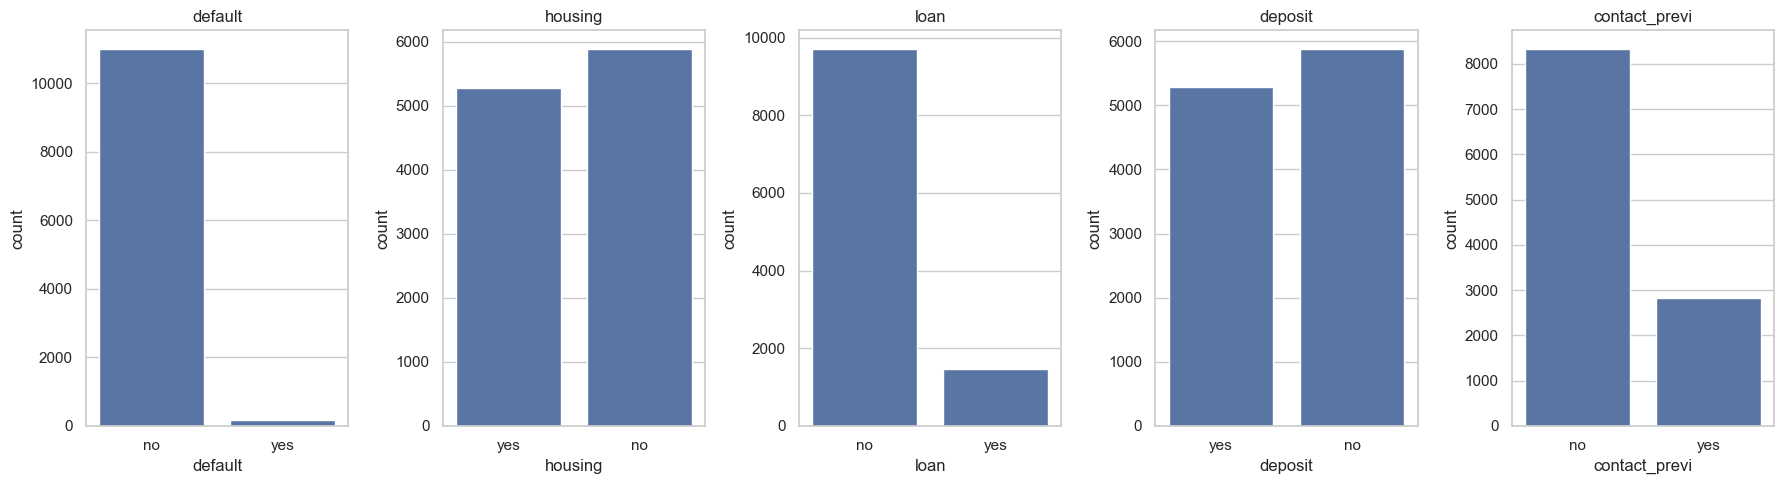

In [792]:
boolean_vars = ['default', 'housing', 'loan', 'deposit', 'contact_previ']
fig, axes = plt.subplots(1, len(boolean_vars), figsize=(18, 5))
for ax, var in zip(axes.flatten(), boolean_vars):
    sns.countplot(x=banc[var], ax=ax)
    ax.set_title(var)
plt.tight_layout()
plt.show()

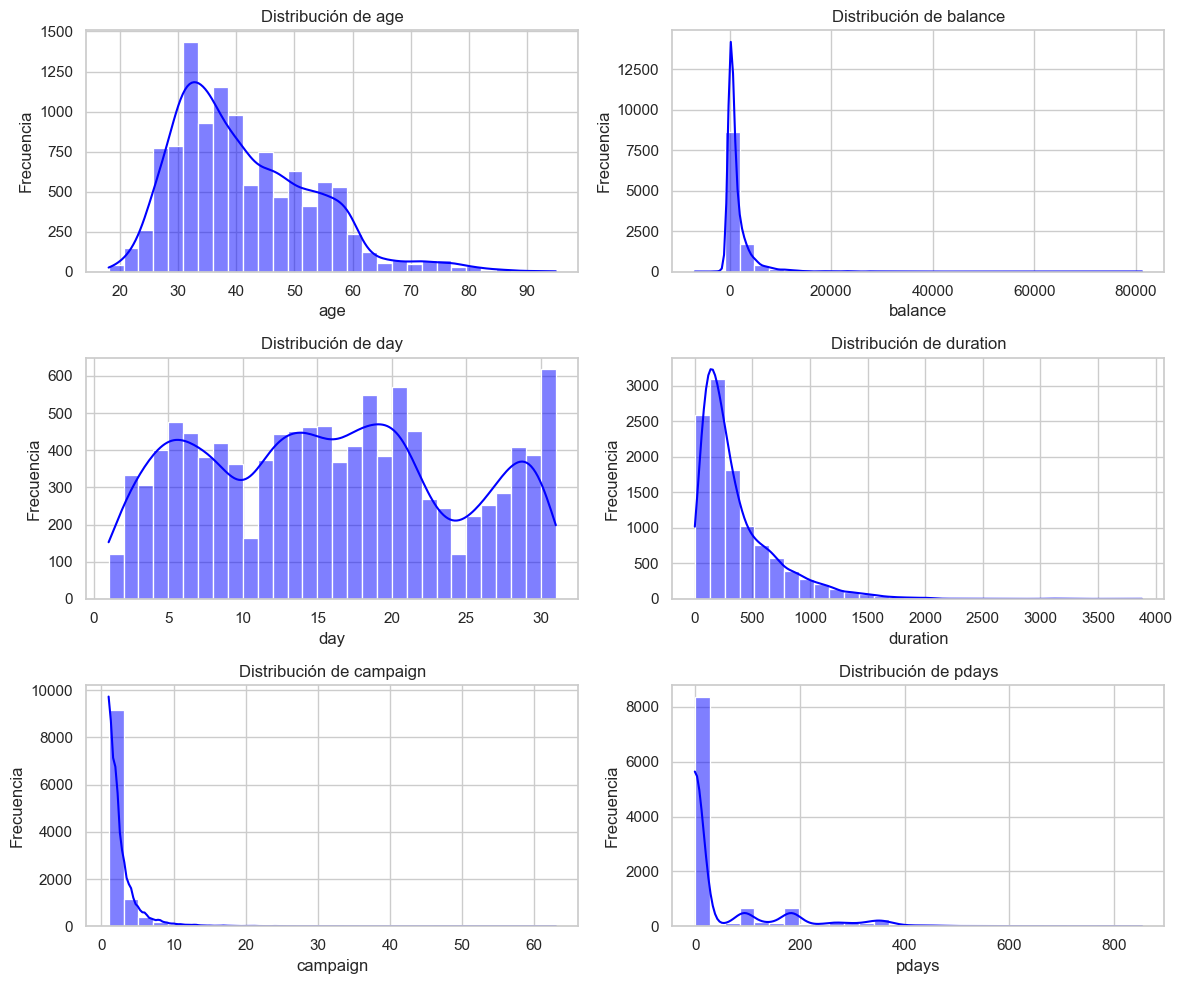

In [793]:
# Lista de columnas numéricas
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

# Crear histogramas
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)  # Ajustar el número de filas y columnas
    sns.histplot(banc[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Observamos que ninguna variable numérica sigue una distribución normal

In [794]:
banc.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,deposit,contact_previ
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,yes,no
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,yes,no
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,yes,no
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,yes,no
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,yes,no


Última gràfica descriptiva de la variable pdays per acabar de decidir com la tractem.

In [795]:
# Filtrar los valores de pdays excluyendo -1
pdays_filtered = banc[banc['pdays'] != -1]['pdays']

# Calcular estadísticas descriptivas
pdays_stats = pdays_filtered.describe()

# Calcular media, mediana y desviación estándar
mean_pdays = pdays_filtered.mean()
median_pdays = pdays_filtered.median()
std_pdays = pdays_filtered.std()

# Imprimir resultados
print("Estadísticas descriptivas para 'pdays' (excluyendo -1):")
print(pdays_stats)
print(f"\nMedia: {mean_pdays}")
print(f"Mediana: {median_pdays}")
print(f"Desviación Estándar: {std_pdays}")


Estadísticas descriptivas para 'pdays' (excluyendo -1):
count    2838.000000
mean      204.818182
std       122.196901
min         1.000000
25%        98.000000
50%       182.000000
75%       286.000000
max       854.000000
Name: pdays, dtype: float64

Media: 204.8181818181818
Mediana: 182.0
Desviación Estándar: 122.1969007200376


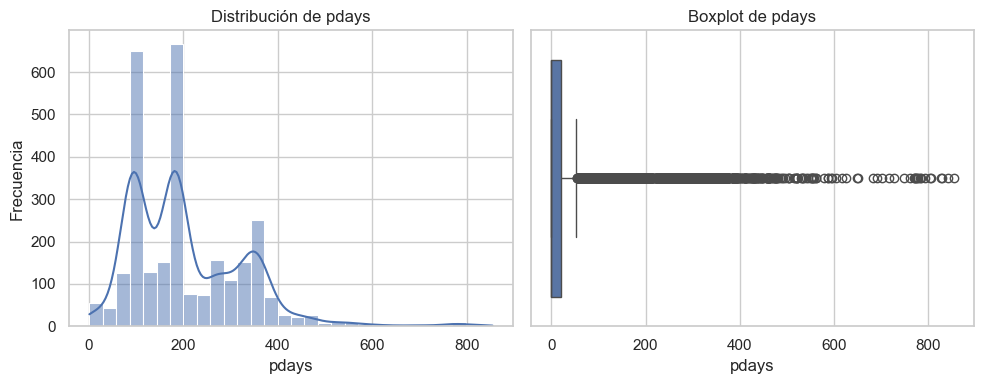

In [796]:
# Histograma
# Crear una figura con subgrillas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Un arreglo 1x2 de subgrillas

# Histograma
sns.histplot(banc[banc['pdays'] != -1]['pdays'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribución de pdays')
axes[0].set_xlabel('pdays')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=banc['pdays'], ax=axes[1])
axes[1].set_title('Boxplot de pdays')
axes[1].set_xlabel('pdays')

# Ajustar el espacio entre subgrillas
plt.tight_layout()
plt.show()

Valoro passar la columna a categòrica en 5 nivells. 


In [797]:
# Definir las condiciones y las etiquetas para las categorías
bins = [-2, -1, 30, 90, 180, float('inf')]  # Ajustando el límite para separar "No contactado"
labels = ['No contactado', 'Contactado recientemente', 'Contactado hace 1-3 meses', 'Contactado hace 3-6 meses', 'Contactado hace más de 6 meses']

# Crear la nueva columna categórica 'pdays_group'
banc['ultimo contacto'] = pd.cut(banc['pdays'], bins=bins, labels=labels)

# Verificar la distribución de las categorías
banc['ultimo contacto'].value_counts()

ultimo contacto
No contactado                     8324
Contactado hace más de 6 meses    1559
Contactado hace 3-6 meses          950
Contactado hace 1-3 meses          273
Contactado recientemente            56
Name: count, dtype: int64

In [798]:
# Eliminar la columna 'pdays'
banc.drop(columns=['pdays'], inplace=True)
banc.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,deposit,contact_previ,ultimo contacto
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,yes,no,No contactado
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,yes,no,No contactado
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,yes,no,No contactado
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,yes,no,No contactado
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,yes,no,No contactado


In [799]:
banc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              11162 non-null  int32   
 1   job              11162 non-null  category
 2   marital          11162 non-null  category
 3   education        11162 non-null  category
 4   default          11162 non-null  object  
 5   balance          11162 non-null  int64   
 6   housing          11162 non-null  object  
 7   loan             11162 non-null  object  
 8   day              11162 non-null  int64   
 9   month            11162 non-null  category
 10  duration         11162 non-null  int64   
 11  campaign         11162 non-null  int64   
 12  deposit          11162 non-null  object  
 13  contact_previ    11162 non-null  category
 14  ultimo contacto  11162 non-null  category
dtypes: category(6), int32(1), int64(4), object(4)
memory usage: 808.2+ KB


In [800]:
# Mostrar valores únicos para cada columna del dataframe
for col in banc.columns:
    print(f"Valores únicos en la columna '{col}':")
    print(banc[col].unique())
    print("\n")

Valores únicos en la columna 'age':
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]


Valores únicos en la columna 'job':
['admin.', 'technician', 'services', 'management', 'retired', ..., 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']


Valores únicos en la columna 'marital':
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


Valores únicos en la columna 'education':
['secondary', 'tertiary', 'primary', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']


Valores únicos en la columna 'default':
['no' 'yes']


Valores únicos en la columna 'balance':
[2343   45 1270 .

Datos convertidos:
   default_numeric  housing_numeric  loan_numeric contact_previ_numeric  \
0                0                1             0                     0   
1                0                0             0                     0   
2                0                1             0                     0   
3                0                1             0                     0   
4                0                0             0                     0   

   deposit_numeric  
0                1  
1                1  
2                1  
3                1  
4                1  
Matriz de Correlación:
                      age   balance       day  duration  campaign  \
age              1.000000  0.112207 -0.000419  0.000142 -0.005355   
balance          0.112207  1.000000  0.010467  0.022436 -0.013894   
day             -0.000419  0.010467  1.000000 -0.018511  0.137007   
duration         0.000142  0.022436 -0.018511  1.000000 -0.041557   
campaign        -0.005355 -0.013894 

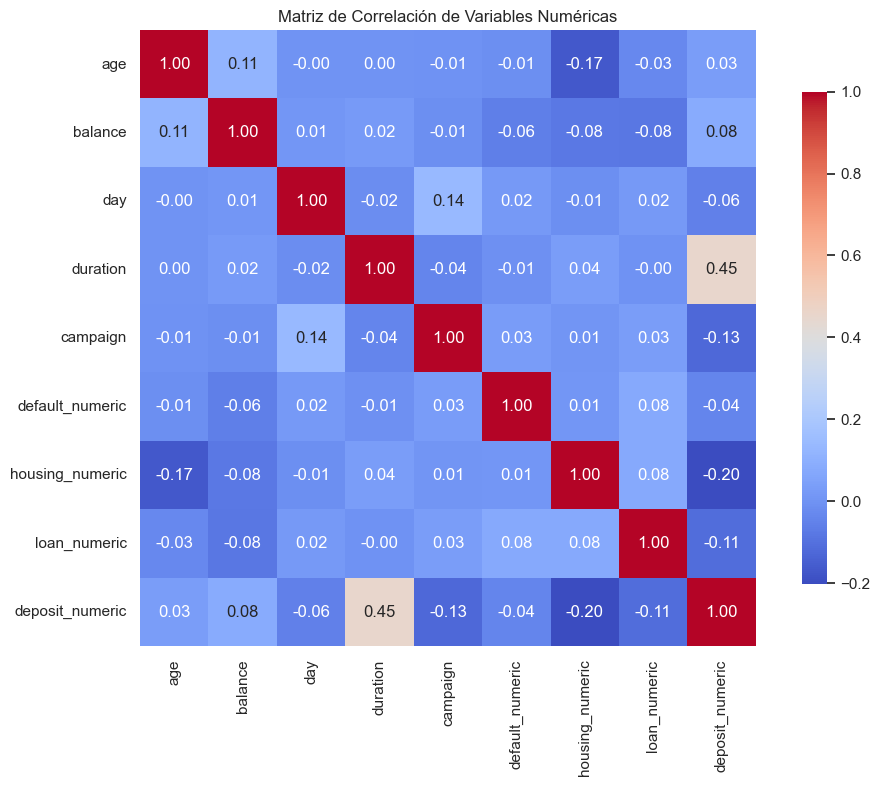

In [808]:
# Convertir las columnas de respuesta a numéricas
banc['default_numeric'] = banc['default'].map({'yes': 1, 'no': 0})
banc['housing_numeric'] = banc['housing'].map({'yes': 1, 'no': 0})
banc['loan_numeric'] = banc['loan'].map({'yes': 1, 'no': 0})
banc['contact_previ_numeric'] = banc['contact_previ'].map({'yes': 1, 'no': 0})

# Convertir la columna 'deposit' a numérica
banc['deposit_numeric'] = banc['deposit'].map({'yes': 1, 'no': 0})

# Comprobar los datos convertidos
print("Datos convertidos:")
print(banc[['default_numeric', 'housing_numeric', 'loan_numeric', 'contact_previ_numeric', 'deposit_numeric']].head())

# Asegurarse de que las columnas categóricas son de tipo 'category'
banc[['job', 'marital', 'education', 'month', 'ultimo contacto']] = banc[['job', 'marital', 'education', 'month', 'ultimo contacto']].astype('category')

# Extraer columnas numéricas (incluyendo la nueva columna 'deposit_numeric')
numerical_cols = banc.select_dtypes(include=['int64', 'int32', 'bool']).columns.tolist()

# Calcular la matriz de correlación
correlation_matrix = banc[numerical_cols].corr()

# Mostrar la matriz de correlación en cifras
print("Matriz de Correlación:")
print(correlation_matrix)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Configurar el título
plt.title('Matriz de Correlación de Variables Numéricas')

# Mostrar el gráfico
plt.show()

Anàlisi de la Matriu de Correlació excloent pdays doncs de moment la tracto com a categòrica.

duration i deposit (0.45):

Hi ha una correlació positiva moderada entre la durada de la trucada i la probabilitat que un client realitzi un dipòsit. Això suggereix que a mesura que augmenta la durada de la trucada, també tendeix a augmentar la probabilitat que el client faci un dipòsit.

housing i deposit (-0.20):
S'observa una correlació negativa dèbil, que indica que aquells que tenen un préstec hipotecari són lleugerament menys propensos a fer un dipòsit. Això podria suggerir que les persones amb hipoteques tenen menys capacitat o motivació per realitzar dipòsits.

campaign i deposit (-0.13):
Hi ha una correlació negativa molt dèbil entre el nombre de contactes realitzats en la campanya i la probabilitat de fer un dipòsit. Això podria implicar que a mesura que augmenten els contactes en la campanya, els clients se senten menys propensos a fer un dipòsit, possiblement per una saturació en la comunicació.

default i deposit (-0.04):
La correlació negativa molt dèbil suggereix que les persones que estan en mora són lleugerament menys propenses a fer un dipòsit. No obstant això, la debilitat d'aquesta correlació indica que no és un factor significatiu.

balance i deposit (0.08):
La correlació positiva molt dèbil suggereix que a major saldo en el compte, també hi ha una lleugera tendència a realitzar dipòsits. No obstant això, és una relació força tènue.

day i deposit (-0.06):
La correlació negativa molt dèbil suggereix que a mesura que avança el mes (dies més alts), la probabilitat de fer un dipòsit disminueix lleugerament.

Observacions Generals
Les correlacions més fortes es troben amb la variable duration, que ressalta la importància de les interaccions més llargues amb els clients en termes de resultats positius (dipòsits).

En general, la majoria de les correlacions són força baixes, cosa que indica que moltes d'aquestes variables no estan fortament relacionades entre si en el context dels dipòsits.

Farem gràfic de dispersió per comparar les variables numèriques.

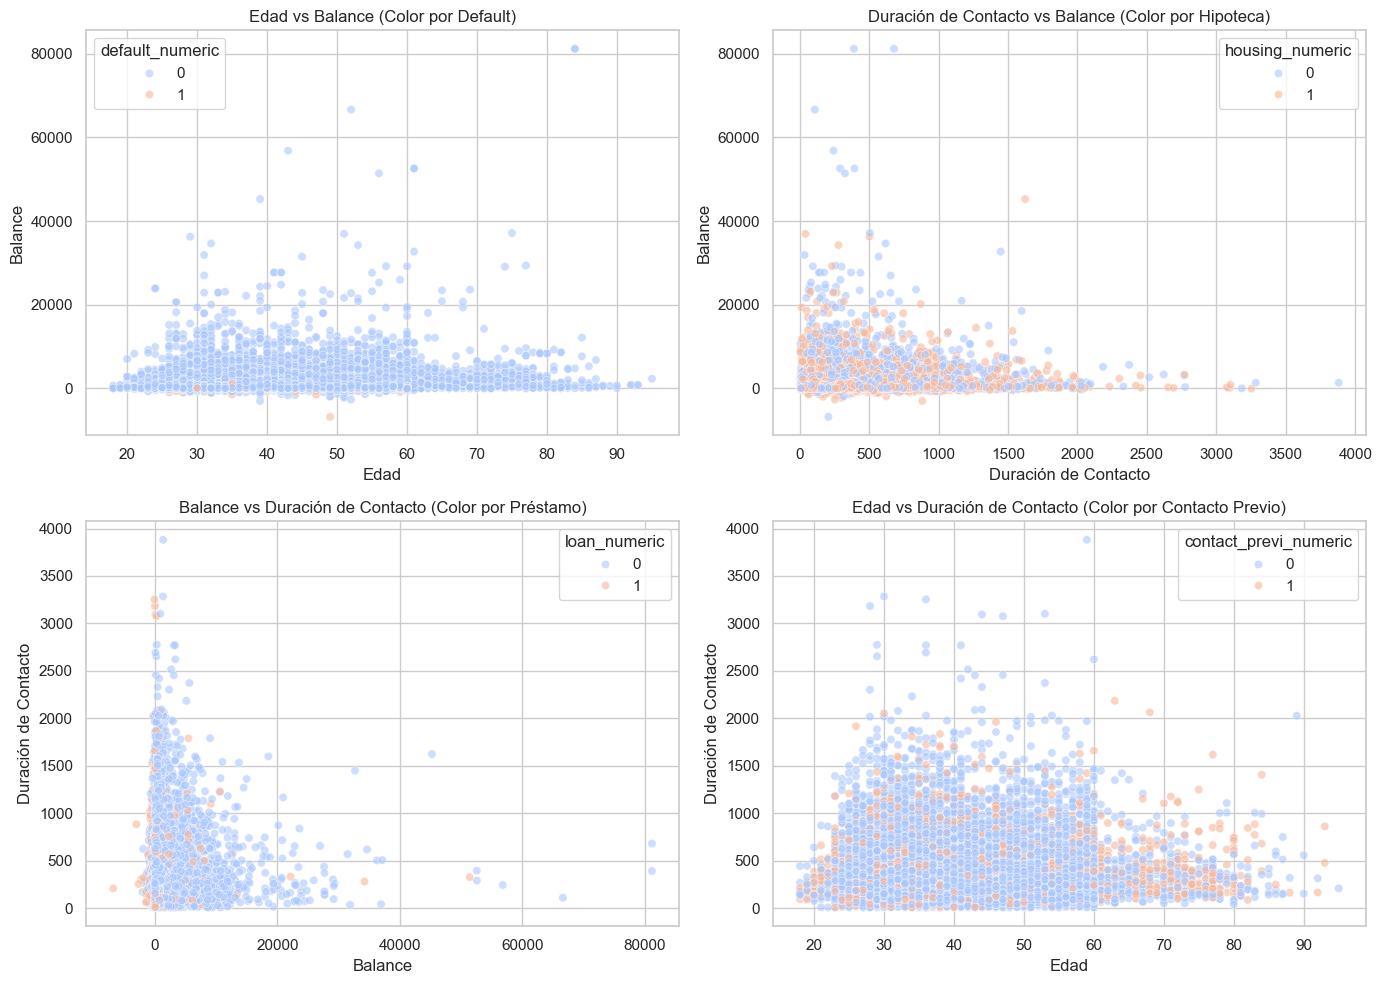

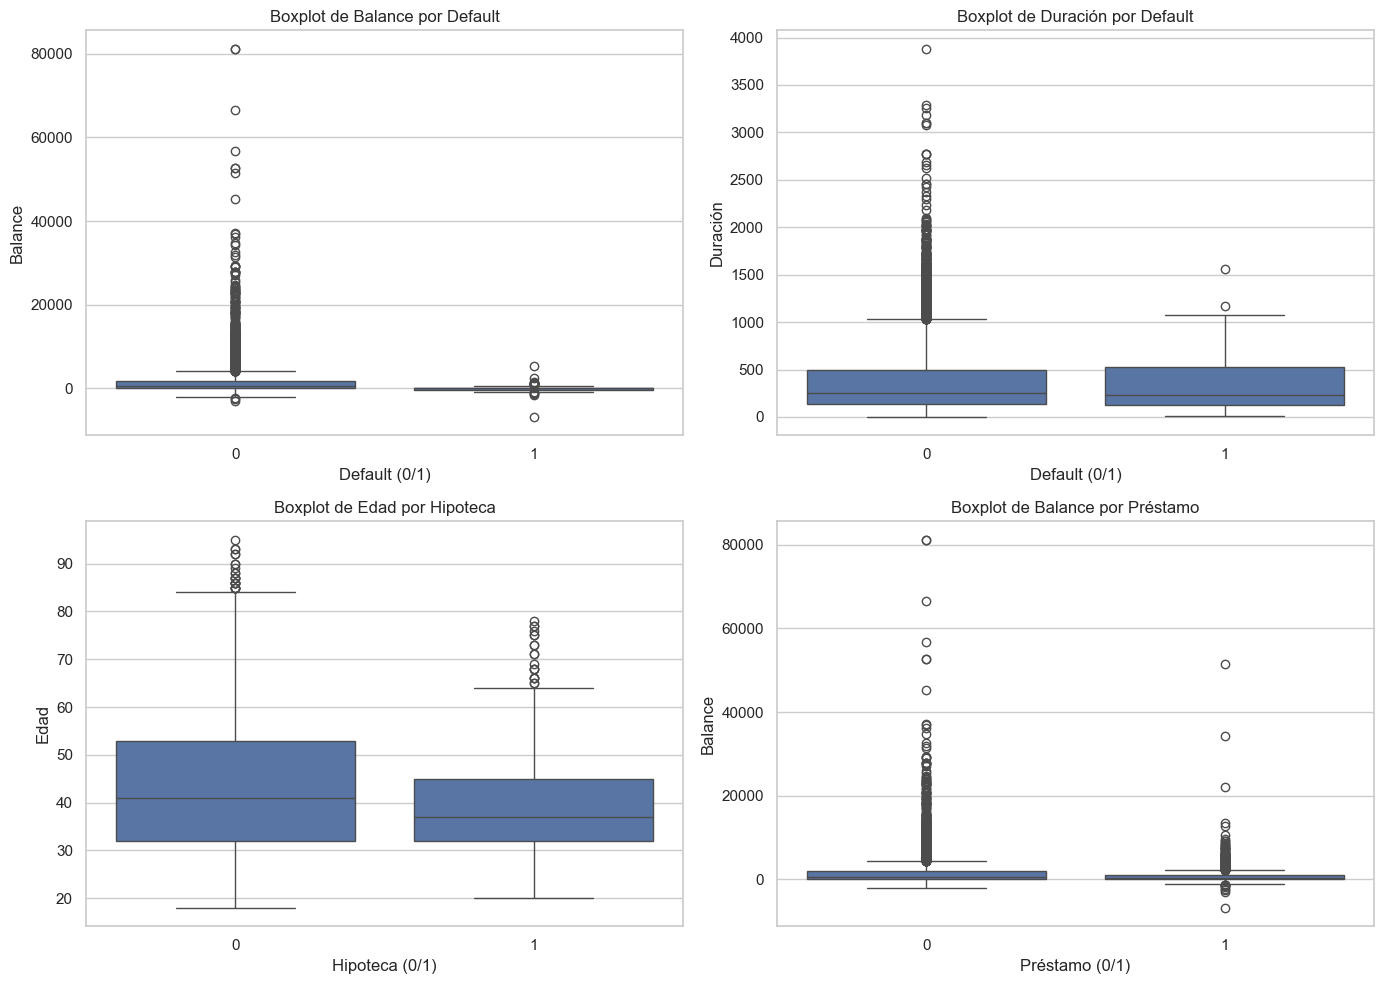

In [806]:
# Configuración de estilo
sns.set(style="whitegrid")

# Gráficos de Dispersión
plt.figure(figsize=(14, 10))

# Gráfico de dispersión: edad vs balance
plt.subplot(2, 2, 1)
sns.scatterplot(data=banc, x='age', y='balance', hue='default_numeric', palette='coolwarm', alpha=0.6)
plt.title('Edad vs Balance (Color por Default)')
plt.xlabel('Edad')
plt.ylabel('Balance')

# Gráfico de dispersión: duración vs balance
plt.subplot(2, 2, 2)
sns.scatterplot(data=banc, x='duration', y='balance', hue='housing_numeric', palette='coolwarm', alpha=0.6)
plt.title('Duración de Contacto vs Balance (Color por Hipoteca)')
plt.xlabel('Duración de Contacto')
plt.ylabel('Balance')

# Gráfico de dispersión: balance vs duración
plt.subplot(2, 2, 3)
sns.scatterplot(data=banc, x='balance', y='duration', hue='loan_numeric', palette='coolwarm', alpha=0.6)
plt.title('Balance vs Duración de Contacto (Color por Préstamo)')
plt.xlabel('Balance')
plt.ylabel('Duración de Contacto')

# Gráfico de dispersión: edad vs duración
plt.subplot(2, 2, 4)
sns.scatterplot(data=banc, x='age', y='duration', hue='contact_previ_numeric', palette='coolwarm', alpha=0.6)
plt.title('Edad vs Duración de Contacto (Color por Contacto Previo)')
plt.xlabel('Edad')
plt.ylabel('Duración de Contacto')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(14, 10))

# Boxplot: Balance por Default
plt.subplot(2, 2, 1)
sns.boxplot(x='default_numeric', y='balance', data=banc)
plt.title('Boxplot de Balance por Default')
plt.xlabel('Default (0/1)')
plt.ylabel('Balance')

# Boxplot: Duración por Default
plt.subplot(2, 2, 2)
sns.boxplot(x='default_numeric', y='duration', data=banc)
plt.title('Boxplot de Duración por Default')
plt.xlabel('Default (0/1)')
plt.ylabel('Duración')

# Boxplot: Edad por Hipoteca
plt.subplot(2, 2, 3)
sns.boxplot(x='housing_numeric', y='age', data=banc)
plt.title('Boxplot de Edad por Hipoteca')
plt.xlabel('Hipoteca (0/1)')
plt.ylabel('Edad')

# Boxplot: Balance por Préstamo
plt.subplot(2, 2, 4)
sns.boxplot(x='loan_numeric', y='balance', data=banc)
plt.title('Boxplot de Balance por Préstamo')
plt.xlabel('Préstamo (0/1)')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()


totes les variables numèriques tenen outliers a excepció de day y month.

In [807]:
df=banc.copy()

Deposit y duration: Tienen una correlación positiva moderada (0.45), lo que sugiere que a medida que aumenta la duración de la llamada, también aumenta la probabilidad de que un cliente haga un depósito.     
Housing y deposit: Correlación negativa débil (-0.20), lo que podría indicar que aquellos que tienen un préstamo de vivienda son menos propensos a hacer un depósito en cierta manera.

Campaign y day: Hay una correlación positiva muy débil (0.14), esto sugiere que hay una ligera tendencia a que a medida que avanza el mes (días más altos), se realicen más contactos en la campaña. Esto podría significar que al final del mes, hay más esfuerzo en la campaña de marketing o que los clientes son más receptivos en ciertos días.

Las correlaciones entre default, balance, housing, y otras variables son bastante débiles, lo que sugiere que estos factores no están fuertemente relacionados entre sí.

Default y deposit: Tienen una correlación negativa muy muy débil (-0.04), lo que sugiere que las personas que tienen un crédito en mora (default) son ligeramente menos propensas a hacer un depósito, pero no doy importancia a este dato por la debilidad de su correlación.   

Contact_previ y deposit: Tienen una correlación positiva débil (0.23), indicando que aquellos que han sido contactados anteriormente tienen una mayor probabilidad de hacer un depósito.

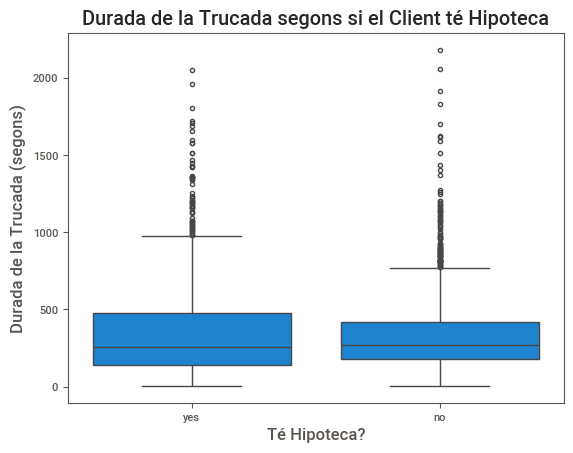

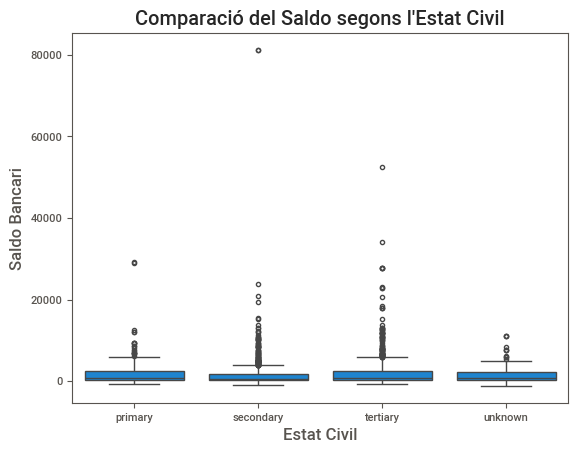

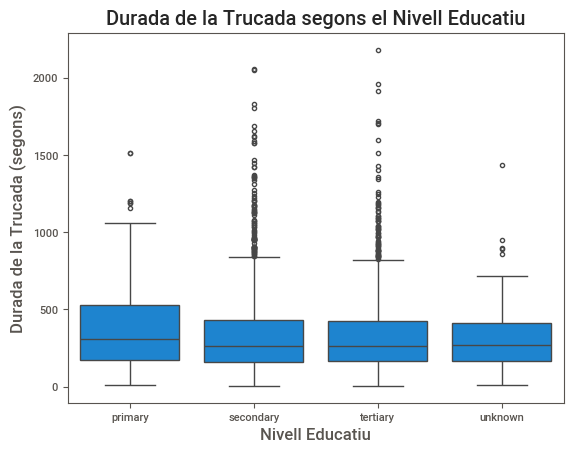

In [913]:
sns.boxplot(data=banc, x='housing', y='duration')
plt.title('Durada de la Trucada segons si el Client té Hipoteca')
plt.xlabel('Té Hipoteca?')
plt.ylabel('Durada de la Trucada (segons)')
plt.show()

sns.boxplot(data=banc, x='education', y='balance')
plt.title('Comparació del Saldo segons l\'Estat Civil')
plt.xlabel('Estat Civil')
plt.ylabel('Saldo Bancari')
plt.show()

sns.boxplot(data=banc, x='education', y='duration')
plt.title('Durada de la Trucada segons el Nivell Educatiu')
plt.xlabel('Nivell Educatiu')
plt.ylabel('Durada de la Trucada (segons)')
plt.show()


C:\Users\thais\AppData\Local\Temp\ipykernel_4596\158551108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job', y='balance', data=banc, palette='Set3')


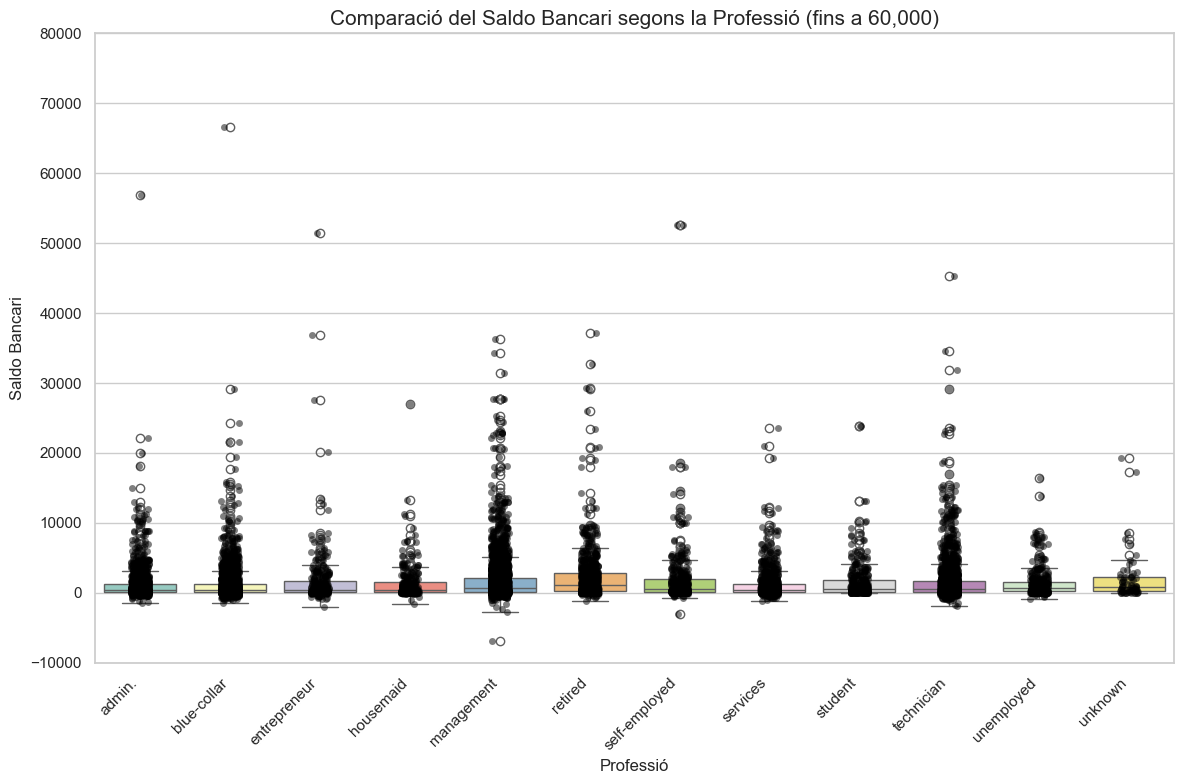

In [820]:
plt.figure(figsize=(12, 8))

# Crear el boxplot per la comparació entre professió i saldo bancari
sns.boxplot(x='job', y='balance', data=banc, palette='Set3')

# Superposar els punts individuals amb un stripplot
sns.stripplot(x='job', y='balance', data=banc, color='black', alpha=0.5, jitter=True)

# Configurar el títol i etiquetes
plt.title('Comparació del Saldo Bancari segons la Professió (fins a 60,000)', fontsize=15)
plt.xlabel('Professió', fontsize=12)
plt.ylabel('Saldo Bancari', fontsize=12)

# Establir els límits de l'eix y per ampliar fins a 40,000 i incloure els negatius
plt.ylim(-10000, 80000)

# Rotar les etiquetes de les professions per evitar que es solapin
plt.xticks(rotation=45, ha='right')

# Mostrar el gràfic amb l'ajust
plt.tight_layout()
plt.show()


C:\Users\thais\AppData\Local\Temp\ipykernel_4596\4085880757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_deposit_counts = banc.groupby(['job', 'deposit_numeric']).size().unstack()


<Figure size 1200x800 with 0 Axes>

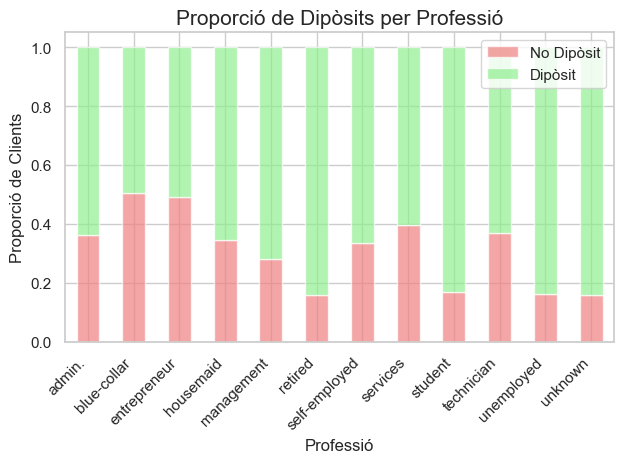

In [834]:
# Crear una taula de contingència entre 'job' i 'deposit_numeric'
job_deposit_counts = banc.groupby(['job', 'deposit_numeric']).size().unstack()

# Calcular les proporcions per cada professió
job_deposit_proportions = job_deposit_counts.div(job_deposit_counts.sum(axis=1), axis=0)

# Configurar el tamany de la figura
plt.figure(figsize=(12, 8))

# Crear el gràfic de barres apilat
job_deposit_proportions.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], alpha=0.7)

# Configurar el títol i etiquetes
plt.title('Proporció de Dipòsits per Professió', fontsize=15)
plt.xlabel('Professió', fontsize=12)
plt.ylabel('Proporció de Clients', fontsize=12)

# Rotar les etiquetes de les professions per evitar que es solapin
plt.xticks(rotation=45, ha='right')

# Llegenda
plt.legend(['No Dipòsit', 'Dipòsit'], loc='upper right')

# Mostrar el gràfic
plt.tight_layout()
plt.show()


Bàsicament els estudiants i retirats són els que tenen més possibilitat de dipòsits.

In [813]:
from scipy.stats import f_oneway

# Dividir les dades segons els nivells educatius
primaria = banc[banc['education'] == 'primary']['balance']
secundaria = banc[banc['education'] == 'secondary']['balance']
terciaria = banc[banc['education'] == 'tertiary']['balance']

# Fer l'ANOVA
f_stat, p_value = f_oneway(primaria, secundaria, terciaria)

print(f"Estadístic ANOVA: {f_stat}")
print(f"P-valor: {p_value}")


Estadístic ANOVA: 32.477955938491206
P-valor: 8.665448649566748e-15


Com ja hem anat veient, a exepció de Day, totes les variables numèriques mostren outliers, a més amb valors molt extrems.

<Figure size 1500x900 with 0 Axes>

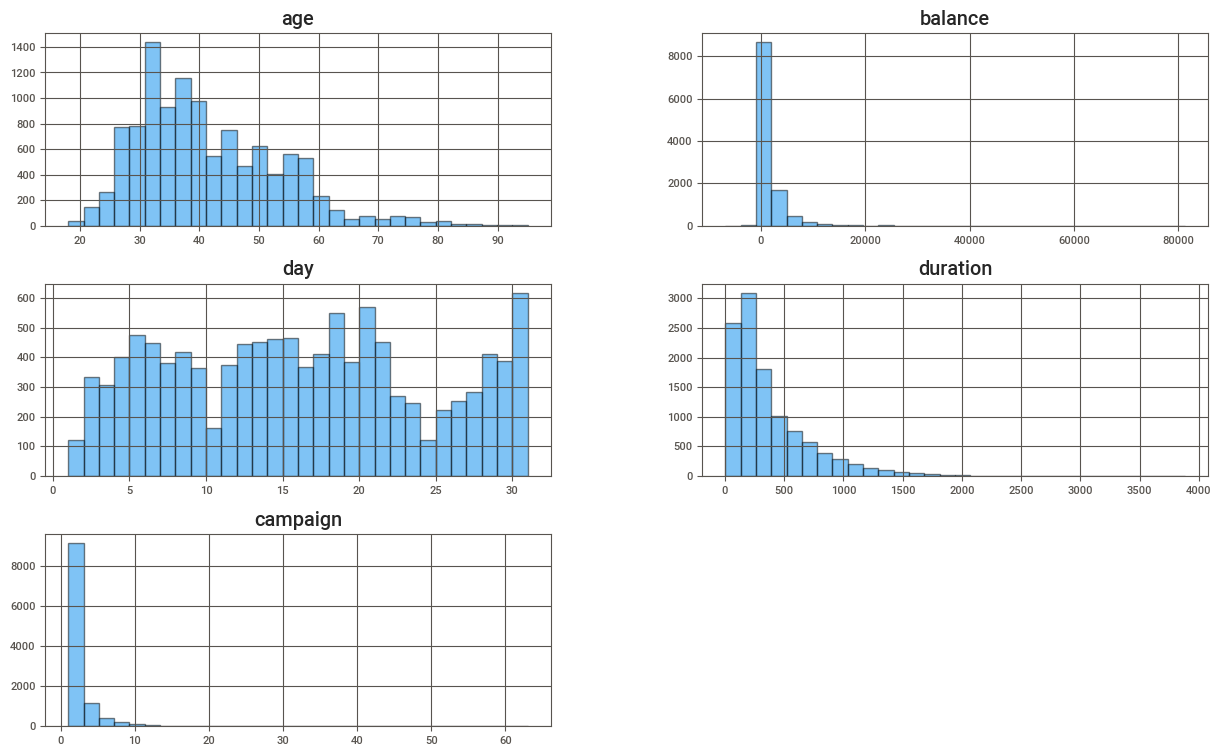

In [660]:
# Histograma de cada variable numèrica
plt.figure(figsize=(15, 9))
banc.hist(bins=30, figsize=(15, 9), alpha=0.5, edgecolor='black')  # Histograma
plt.title('Histogramas de Variables Numéricas')

# Añadir la curva de densidad
for column in banc.select_dtypes(include=['int64', 'float64']).columns:
    sns.kdeplot(banc[column], color='blue', linewidth=2)

plt.show()

Totes les variables estan desbalancejades. En el cas de dies, són valors rectes perquè són tractats com una categòrica.

In [661]:
# Comptar els valors de cada variable categòrica
for column in banc.select_dtypes(include=['object']).columns:
    print(banc[column].value_counts())

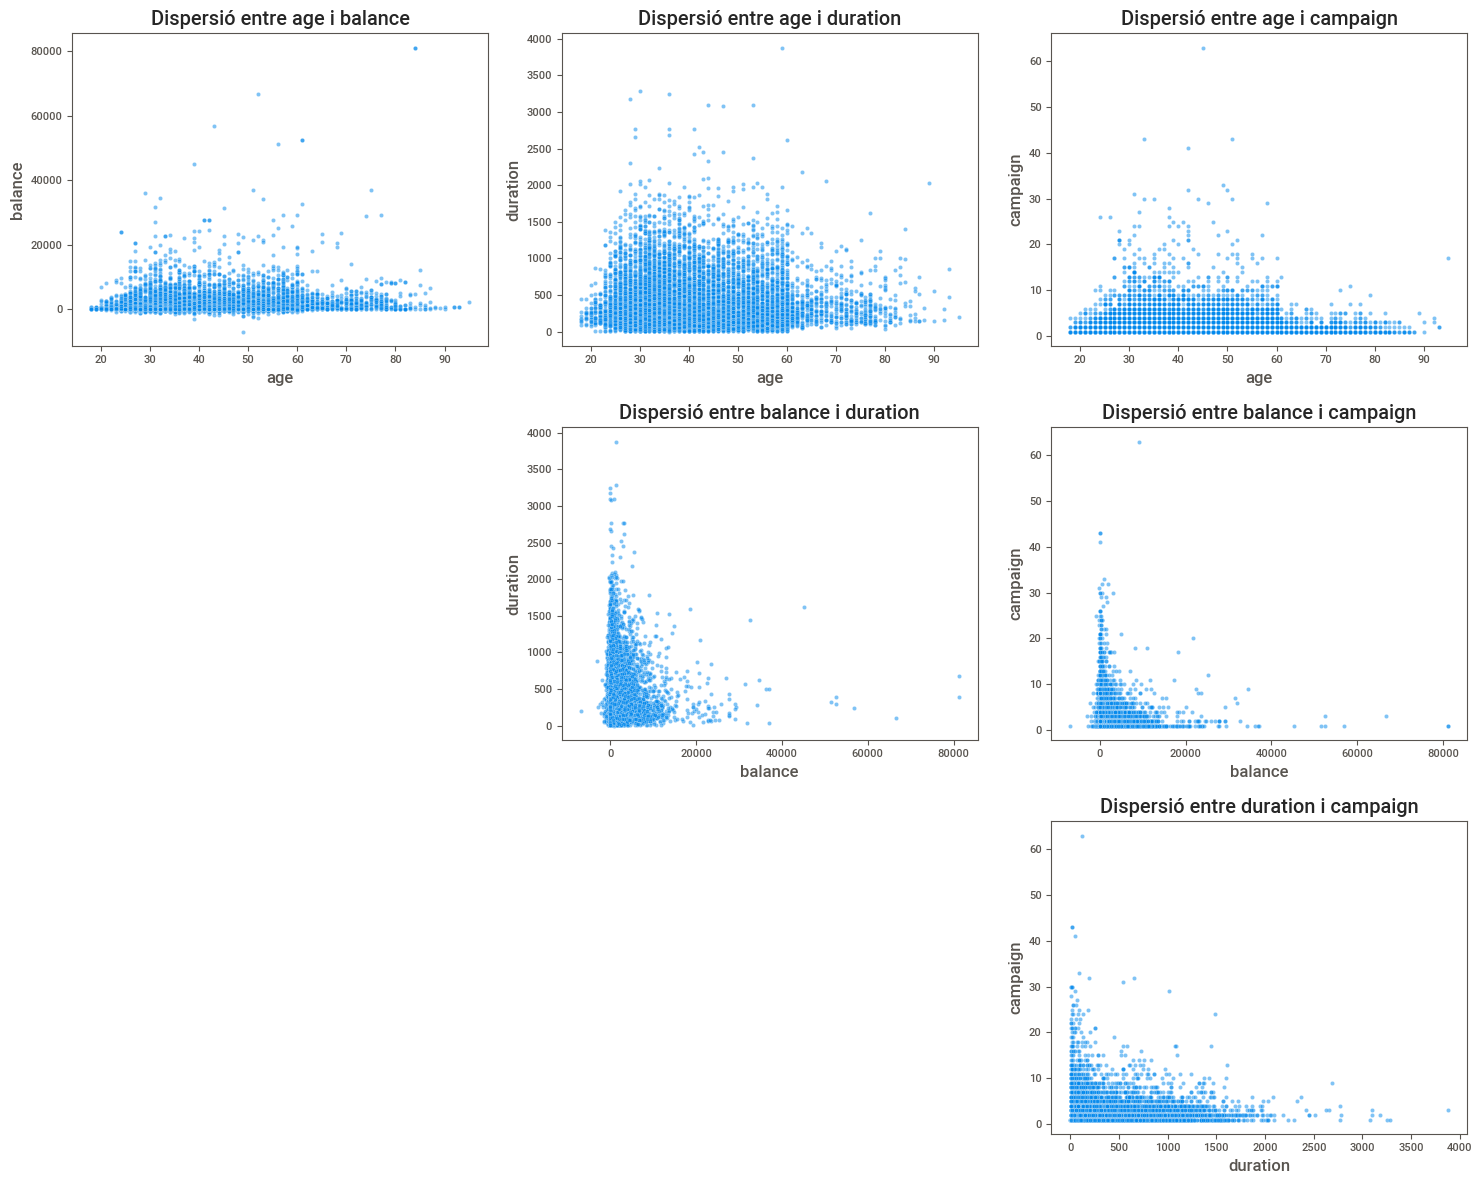

In [662]:
numeric_cols2 = ['age', 'balance', 'duration', 'campaign']

# Crear una figura per als gràfics
plt.figure(figsize=(15, 12))

# Crear gràfics de dispersió entre cada parell de variables numèriques
for i in range(len(numeric_cols2)):
    for j in range(i + 1, len(numeric_cols2)):
        plt.subplot(len(numeric_cols2)-1, len(numeric_cols2)-1, (i * (len(numeric_cols2)-1)) + j)
        sns.scatterplot(x=banc[numeric_cols2[i]], y=banc[numeric_cols2[j]], alpha=0.5)
        plt.title(f'Dispersió entre {numeric_cols2[i]} i {numeric_cols2[j]}')
        plt.xlabel(numeric_cols2[i])
        plt.ylabel(numeric_cols2[j])

plt.tight_layout()  # Ajustar l'espai entre gràfics
plt.show()

In [ ]:
creo que la decisión de pasar a categorica ultimo contacto no ha sido demasiado 

C:\Users\thais\AppData\Local\Temp\ipykernel_4596\1569489977.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_deposit_counts = banc.groupby(['ultimo contacto', 'deposit_numeric']).size().unstack()


<Figure size 1000x600 with 0 Axes>

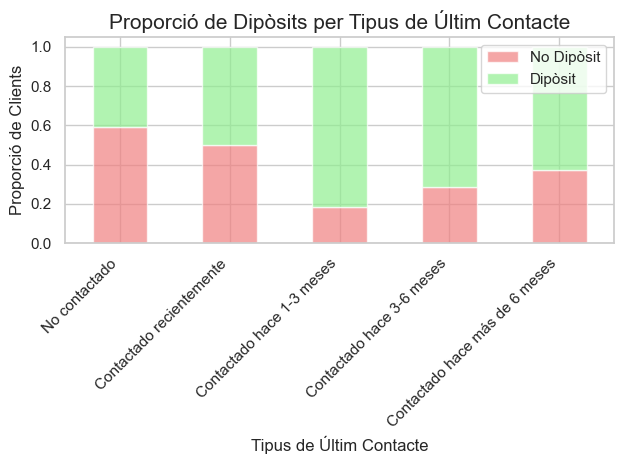

In [825]:
contact_deposit_counts = banc.groupby(['ultimo contacto', 'deposit_numeric']).size().unstack()

# Calcular les proporcions per cada tipus de contacte
contact_deposit_proportions = contact_deposit_counts.div(contact_deposit_counts.sum(axis=1), axis=0)

# Configurar el tamany de la figura
plt.figure(figsize=(10, 6))

# Crear el gràfic de barres apilat
contact_deposit_proportions.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], alpha=0.7)

# Configurar el títol i etiquetes
plt.title('Proporció de Dipòsits per Tipus de Últim Contacte', fontsize=15)
plt.xlabel('Tipus de Últim Contacte', fontsize=12)
plt.ylabel('Proporció de Clients', fontsize=12)

# Rotar les etiquetes del darrer contacte per evitar que es solapin
plt.xticks(rotation=45, ha='right')

# Llegenda
plt.legend(['No Dipòsit', 'Dipòsit'], loc='upper right')

# Mostrar el gràfic
plt.tight_layout()
plt.show()


In [830]:
# Copiar la columna pdays del dataframe original al dataframe banc
banc['pdays'] = banc_original['pdays']

int64


In [831]:
# Eliminar les files on pdays és -1
banc = banc[banc['pdays'] != -1]

# Comprovar si s'han eliminat els valors -1
print(banc['pdays'].unique())


[166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167 122
 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90 196
 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112  41
 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328  74
 148 327 341 145 266 234 345 318 325 274 343 260 305 344 254 180 340  82
 181 278 153   4 349 334 176  87 269  86 169  83  79   6 259  13 161 350
  84  80 164  22 296  66 263 333  17  89  78 286 337 364 188 342 363 352
 295 353 356 288 367 366 359 347 370 284 300 306 361 287 301 355 371 292
 360 358 346 357 368 312 179 329 298 372 374 375 291  95 109  94  98 186
 101 187 321  40  96  21  35  97 285 103 212 293  81  38  28  67  60 120
  55 113  71 119  72  20 391  50 207 105 314 211 140 104  65 395 399  49
 389 386 412  62 229 385 156  63  64  69 394  70 185 102 190 461 116 422
 457 430 192 462 403 191 459 397 197 173 271 428 392 193 474 475 477 130
 283 157 476 131 132 129 134 114 121 107 115  58  5

Matriz de Correlación:
                      age   balance       day  duration  campaign  \
age              1.000000  0.121180  0.043775  0.068789 -0.015585   
balance          0.121180  1.000000  0.031385  0.034434 -0.005268   
day              0.043775  0.031385  1.000000 -0.006716 -0.002518   
duration         0.068789  0.034434 -0.006716  1.000000 -0.026138   
campaign        -0.015585 -0.005268 -0.002518 -0.026138  1.000000   
default_numeric -0.022986 -0.023495 -0.000770  0.010607 -0.016596   
housing_numeric -0.154572 -0.082159 -0.091866  0.020728  0.033558   
loan_numeric    -0.026266 -0.072972 -0.017141 -0.022439  0.019448   
deposit_numeric  0.075194  0.078937  0.044482  0.313047 -0.117246   
pdays           -0.062884 -0.062961 -0.032450  0.037588  0.039973   

                 default_numeric  housing_numeric  loan_numeric  \
age                    -0.022986        -0.154572     -0.026266   
balance                -0.023495        -0.082159     -0.072972   
day             

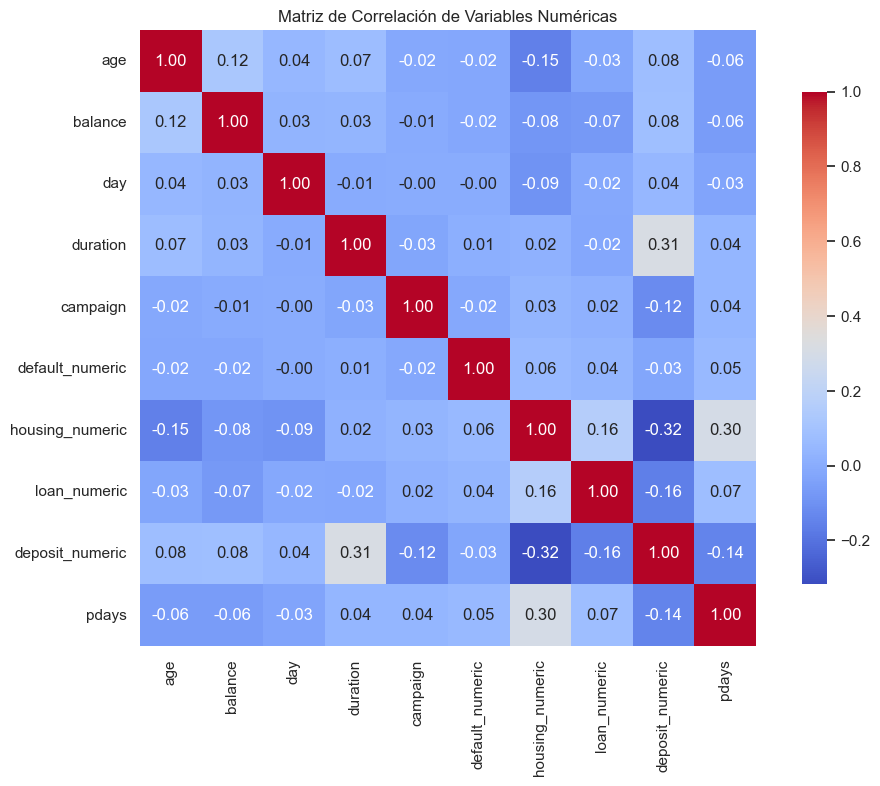

In [835]:
# Extraer columnas numéricas (incluyendo la nueva columna 'deposit_numeric')
numerical_cols = banc.select_dtypes(include=['int64', 'int32', 'bool']).columns.tolist()

# Calcular la matriz de correlación
correlation_matrix = banc[numerical_cols].corr()

# Mostrar la matriz de correlación en cifras
print("Matriz de Correlación:")
print(correlation_matrix)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Configurar el título
plt.title('Matriz de Correlación de Variables Numéricas')

# Mostrar el gráfico
plt.show()

realment, al afegir la variable pdays, ens apareix una nova correlació interessant amb housing. 

In [836]:
df= banc.copy()

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 890 to 11160
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    2838 non-null   int32   
 1   job                    2838 non-null   category
 2   marital                2838 non-null   category
 3   education              2838 non-null   category
 4   default                2838 non-null   object  
 5   balance                2838 non-null   int64   
 6   housing                2838 non-null   object  
 7   loan                   2838 non-null   object  
 8   day                    2838 non-null   int64   
 9   month                  2838 non-null   category
 10  duration               2838 non-null   int64   
 11  campaign               2838 non-null   int64   
 12  deposit                2838 non-null   object  
 13  contact_previ          2838 non-null   category
 14  ultimo contacto        2838 non-null   cat

TRANSFORMACIONS:  
plantejament de les transformacions: 

Mantenir deposit en el seu estat original, doncs és el target.  
Aplicar get_dummies a les variables categòriques a excepció de dipòsit.   
Aplicar RobustScaler a las variables numèriques, doncs totes tenen outliers.   
Aplicar OrdinalEncoder a day y month. 
Convertir les variables booleanas amb hot encoder.
 

dataset nou amb:
target: deposit
numèriques:  
age, balance, duration, campaign, pdays
ordinals :  day, month
categòriques:  job, marital, education, 
bool:
default, housing, loan, contact_previ


In [904]:
df_nuevo = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'day', 'month', 
               'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact_previ']].copy()

# Mantener 'deposit' del df original 'banc' como target
df_nuevo['deposit'] = banc['deposit']

df_nuevo.head()

,age,balance,duration,campaign,pdays,day,month,job,marital,education,default,housing,loan,contact_previ,deposit
890,42,-247,519,1,166,21,oct,admin.,single,secondary,no,yes,yes,yes,yes
891,33,3444,144,1,91,21,oct,services,married,secondary,no,yes,no,yes,yes
899,56,589,518,1,147,23,oct,technician,married,secondary,no,yes,no,yes,yes
933,34,899,114,1,170,12,nov,admin.,married,tertiary,no,yes,no,yes,yes
951,53,2269,1091,2,150,17,nov,retired,married,tertiary,no,no,no,yes,yes


In [905]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 890 to 11160
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    2838 non-null   int32   
 1   job                    2838 non-null   category
 2   marital                2838 non-null   category
 3   education              2838 non-null   category
 4   default                2838 non-null   object  
 5   balance                2838 non-null   int64   
 6   housing                2838 non-null   object  
 7   loan                   2838 non-null   object  
 8   day                    2838 non-null   int64   
 9   month                  2838 non-null   category
 10  duration               2838 non-null   int64   
 11  campaign               2838 non-null   int64   
 12  deposit                2838 non-null   object  
 13  contact_previ          2838 non-null   category
 14  ultimo contacto        2838 non-null   cat

In [906]:
# 1. Convertir columnas booleanas a bool
bool_cols = ['default', 'housing', 'loan']
df_nuevo[bool_cols] = df_nuevo[bool_cols].replace({'yes': True, 'no': False}).astype(bool)

# 2. Convertir 'contact_previ' a bool
df_nuevo['contact_previ'] = df_nuevo['contact_previ'].cat.rename_categories({True: True, False: False}).astype(bool)

# 3. Convertir columnas numéricas a int
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays']
df_nuevo[num_cols] = df_nuevo[num_cols].astype(int)

# 4. Convertir 'day' y 'month' a category
df_nuevo['day'] = df_nuevo['day'].astype('category')
df_nuevo['month'] = df_nuevo['month'].astype('category')

# 5. Convertir columnas categóricas a category
cat_cols = ['job', 'marital', 'education']
df_nuevo[cat_cols] = df_nuevo[cat_cols].astype('category')

# 6. Convertir las columnas booleanas a int 
df_nuevo[bool_cols] = df_nuevo[bool_cols].astype(int)
df_nuevo['contact_previ'] = df_nuevo['contact_previ'].astype(int)
df_nuevo

,age,balance,duration,campaign,pdays,day,month,job,marital,education,default,housing,loan,contact_previ,deposit
890,42,-247,519,1,166,21,oct,admin.,single,secondary,0,1,1,1,yes
891,33,3444,144,1,91,21,oct,services,married,secondary,0,1,0,1,yes
899,56,589,518,1,147,23,oct,technician,married,secondary,0,1,0,1,yes
933,34,899,114,1,170,12,nov,admin.,married,tertiary,0,1,0,1,yes
951,53,2269,1091,2,150,17,nov,retired,married,tertiary,0,0,0,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,40,54,10,5,362,13,may,blue-collar,divorced,primary,0,1,0,1,no
11133,37,1594,110,1,260,17,apr,management,married,tertiary,0,1,0,1,no
11145,60,-134,243,1,271,12,may,retired,divorced,tertiary,0,0,0,1,no
11155,35,80,38,2,172,21,nov,blue-collar,married,secondary,0,1,1,1,no


In [907]:
# Crear una lista de las columnas booleanas
bool_cols = ['default', 'housing', 'loan', 'contact_previ']

# Convertir 'yes' y 'no' a True y False para las columnas booleanas
df_nuevo[bool_cols] = df_nuevo[bool_cols].replace({'yes': True, 'no': False})

# Convertir las columnas a tipo booleano
df_nuevo[bool_cols] = df_nuevo[bool_cols].astype(bool)

# Comprobar los tipos de datos de las columnas después de la conversión
print(df_nuevo.dtypes)


age                 int32
balance             int32
duration            int32
campaign            int32
pdays               int32
day              category
month            category
job              category
marital          category
education        category
default              bool
housing              bool
loan                 bool
contact_previ        bool
deposit            object
dtype: object


In [911]:
# 1. Mantener la columna 'deposit' en su estado original
target = df_nuevo['deposit']

# 2. Aplicar get_dummies a las variables categóricas (excepto 'deposit')
categorical_cols = df_nuevo.select_dtypes(include=['category']).columns.tolist()

# Verificar si 'deposit' está en la lista
if 'deposit' in categorical_cols:
    categorical_cols.remove('deposit')  # Asegurarse de no incluir 'deposit'

# Aplicar get_dummies
df_dummies = pd.get_dummies(df_nuevo[categorical_cols], drop_first=True)

# 3. Aplicar RobustScaler a las variables numéricas
numerical_cols = df_nuevo.select_dtypes(include=['int32', 'int64']).columns.tolist()

scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_nuevo[numerical_cols]), columns=numerical_cols)

# 4. Aplicar OrdinalEncoder a 'day' y 'month'
ordinal_cols = ['day', 'month']
ordinal_encoder = OrdinalEncoder()
df_ordinal = pd.DataFrame(ordinal_encoder.fit_transform(df_nuevo[ordinal_cols]), columns=ordinal_cols)

# 5. Convertir las variables booleanas a dummies
boolean_cols = df_nuevo.select_dtypes(include=['bool']).columns.tolist()
boolean_encoder = OneHotEncoder(sparse_output=False)  # Cambiado a sparse_output
df_boolean = pd.DataFrame(boolean_encoder.fit_transform(df_nuevo[boolean_cols]), columns=boolean_encoder.get_feature_names_out(boolean_cols))

# Concatenar todo en un solo DataFrame
df_final = pd.concat([df_scaled, df_ordinal, df_dummies, df_boolean, target.reset_index(drop=True)], axis=1)

# Ver el DataFrame final
df_final.head()


,age,balance,duration,campaign,pdays,day,month,day_2,day_3,day_4,...,education_tertiary,education_unknown,default_False,default_True,housing_False,housing_True,loan_False,loan_True,contact_previ_True,deposit
0,0.222222,-0.526130,0.918919,0.0,-0.085106,20.0,10.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,1.0,yes
1,-0.277778,1.477942,-0.432432,0.0,-0.484043,20.0,10.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,yes
2,1.000000,-0.072214,0.915315,0.0,-0.186170,22.0,10.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,yes
3,-0.222222,0.096104,-0.540541,0.0,-0.063830,11.0,9.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0,1.0,yes
4,0.833333,0.839962,2.980180,1.0,-0.170213,16.0,9.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,1.0,yes


In [909]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# Modelos de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

DAY L'hauriem de passar a ordinal per tal de que es tracti potser com una catagòrica